## Perform ‘Exploratory Data Analysis’ on dataset ‘Mallcustomers’

### Author:-Kavan Prajapati

In [1]:
## Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Finding a range of customers according to age group in Mall_customers.

<AxesSubplot:xlabel='Age', ylabel='Count'>

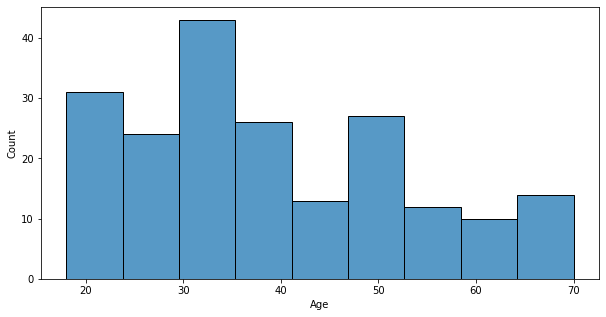

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(x="Age",data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

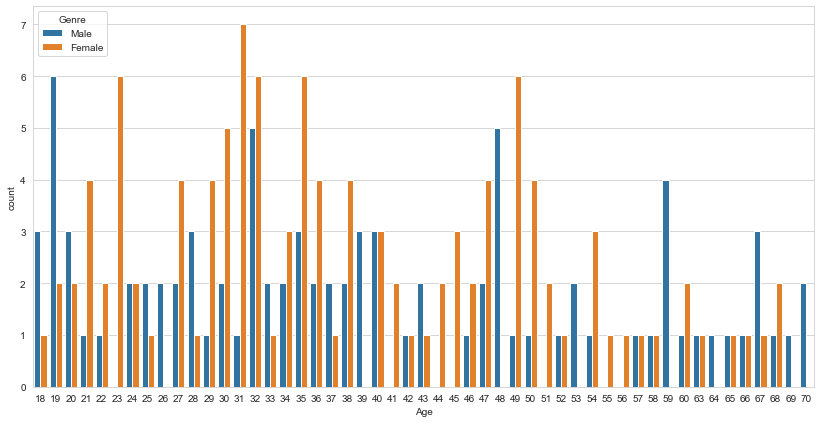

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,7))
sns.countplot("Age",data=df,hue="Genre")

### It can be clearly seen that age group of Female 23,31,32,35,49 and age group of Male 19,32,48 are maximum in Mall_customers.

In [9]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Relation between age and Spending Score and Annual Income

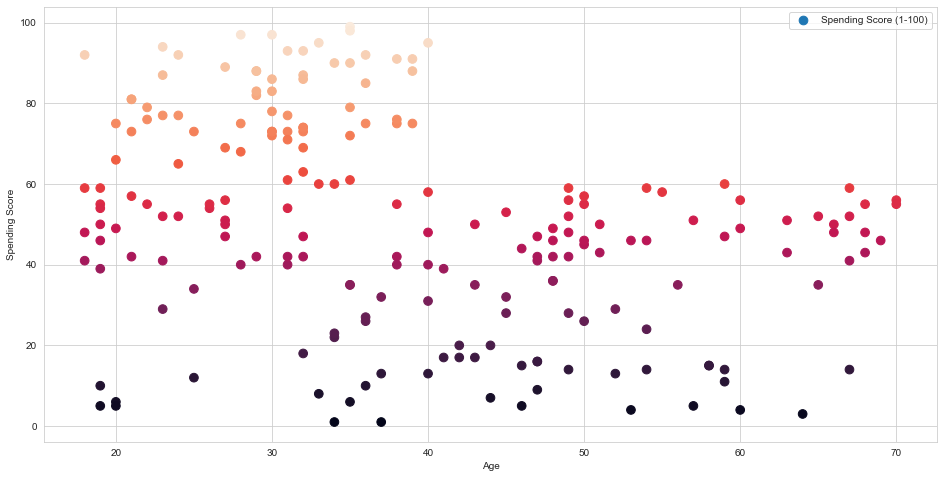

In [10]:
plt.figure(figsize=(16,8))
plt.scatter("Age","Spending Score (1-100)",data=df,c="Spending Score (1-100)",s=75)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.legend()

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

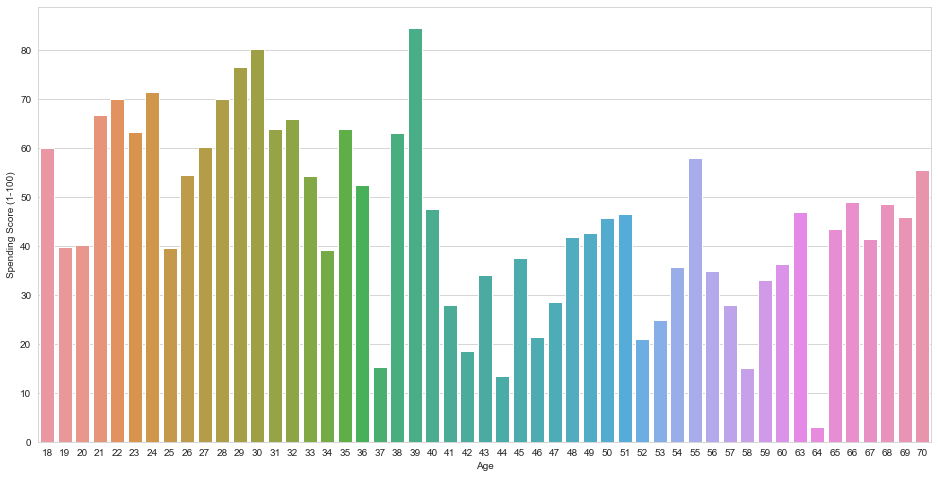

In [11]:
plt.figure(figsize=(16,8))
sns.barplot("Age","Spending Score (1-100)",data=df,ci=None)

### From the above graph ,it can be seen that the age group between 18-40 having higher Spending Score upto 100 and the age group between 41 - 70 having less Spending Score upto 60

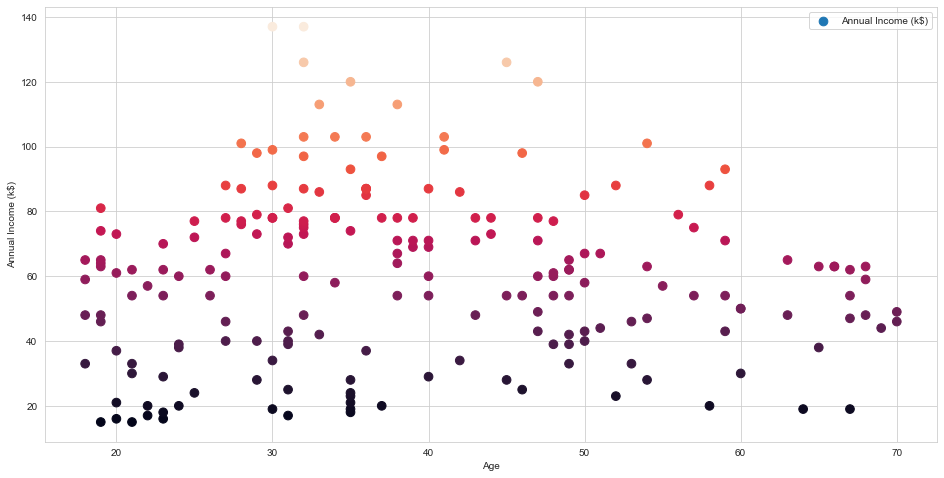

In [12]:
plt.figure(figsize=(16,8))
plt.scatter("Age","Annual Income (k$)",data=df,c="Annual Income (k$)",s=75)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.legend()
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

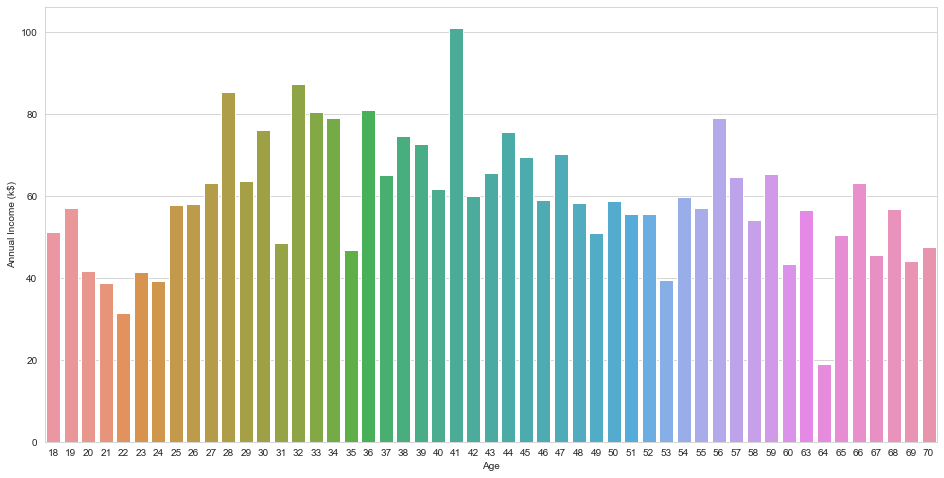

In [13]:
plt.figure(figsize=(16,8))
sns.barplot("Age","Annual Income (k$)",data=df,ci=False)

### From the above graph it can be seen that Age group between 28-41 having higher Annual Income upto 100(k doller) and the remainig age group having Annual Income upto 80(k doller)

### Cluster of Annual Income (k) V/s Spending Score and obervation reading accordingly

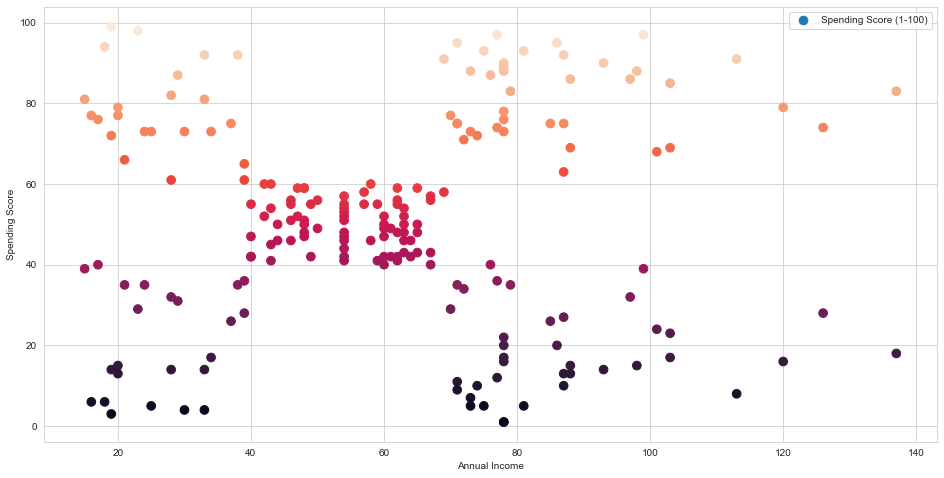

In [14]:
plt.figure(figsize=(16,8))
plt.scatter("Annual Income (k$)","Spending Score (1-100)",data=df,c="Spending Score (1-100)",s=75)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

### From the above graph it can be observed that no of cluster is 5

### But lets verify it by Elbow method

In [16]:
#Training the Model by taking different no cluster ranging between 1 to 10 that will help us to find the Elbow point
from sklearn.cluster import KMeans
kmeans=[]
for i in range(1,20):
    KMNS=KMeans(n_clusters=i,random_state=0)
    KMNS.fit(df.iloc[:,3:4])
    kmeans.append(KMNS.inertia_)

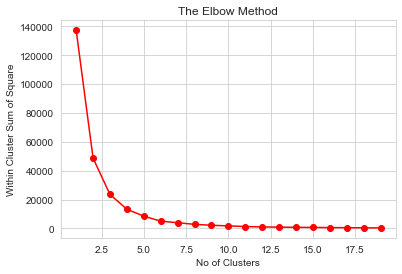

In [19]:
#To find the Elbow point by plotting the trained model
plt.plot(range(1,20),kmeans,color="red",marker="o")
plt.xlabel("No of Clusters")
plt.ylabel("Within Cluster Sum of Square")
plt.title("The Elbow Method")
plt.show()

### Now it is clear that after 5 in the x_axis ,showing similar behavier .So no Cluster=5

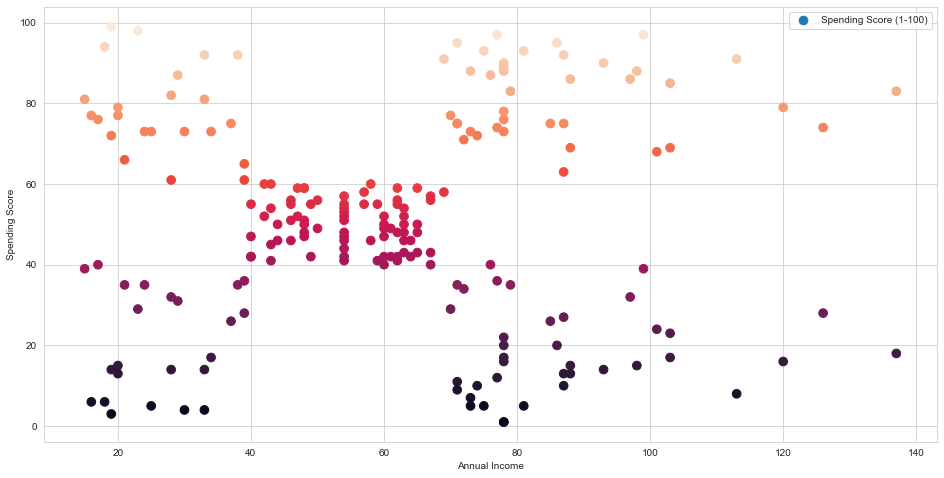

In [21]:
plt.figure(figsize=(16,8))
plt.scatter("Annual Income (k$)","Spending Score (1-100)",data=df,c="Spending Score (1-100)",s=75)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()